In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_csv("./1-studyhours.csv")
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


Text(0, 0.5, 'Score')

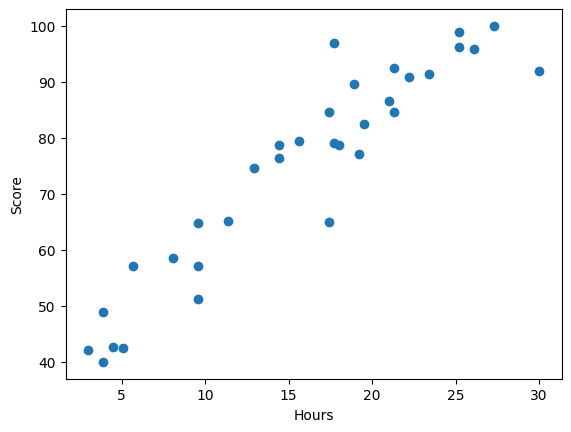

In [4]:
plt.scatter(x="Study Hours",y="Exam Score",data=df)
plt.xlabel("Hours")
plt.ylabel("Score")


<Axes: >

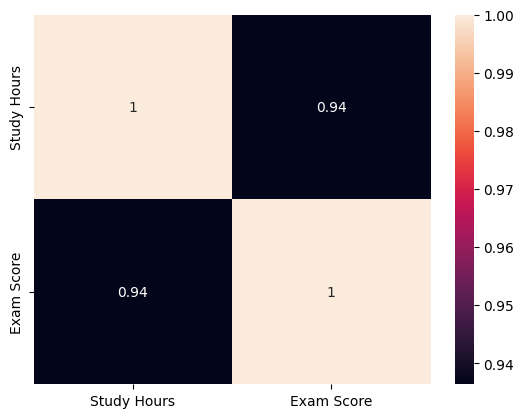

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
X=df[["Study Hours"]] # X should be dataframe
y=df["Exam Score"] # y (label) can be series

In [7]:
# Test / Train Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [8]:
# Standartization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) #fit-> apply z formula for standartization
X_test=scaler.transform(X_test) #test data icin "fit" kullanilmaz cunku data leakage engellenir.




In [9]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
print("Coefficient",regression.coef_)
print("Intersct",regression.intercept_)

Coefficient [16.17860223]
Intersct 76.9076923076923


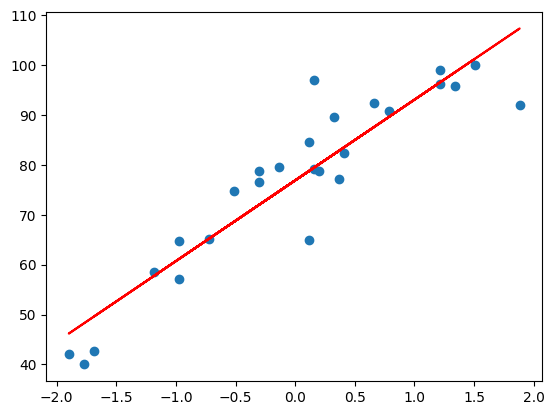

In [11]:
# Best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.show()

In [12]:
regression.predict(scaler.transform([[20]]))

c:\Users\peker\Desktop\DataScience\dsvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [14]:
# Model Performance Evaluation R Square, Adjusted R Square

y_pred_test=regression.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#### rmse, mae and mse is good to compare the accuracy between two different model

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)

mse: 29.45839048833392
mae: 4.054868128856142
rmse: 5.427558427906043


In [ ]:
##### close to 1 is good score. use the evaluate perdormnace of your model

r2=r2_score(y_test,y_pred_test)
print("r2_score",r2)

r2_score 0.9196596206825491
